In [133]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('dji.csv', header=1, index_col=0, usecols=[0,1,2,3,4])

df.head()

,Date,Dow Jones value,RIS Forecast Volume,RIS Actual Volume
NaN,1/4/2016,17148.94,6547,6886
NaN,1/5/2016,17158.66,4328,4928
NaN,1/6/2016,16906.51,3987,3713
NaN,1/7/2016,16514.10,4006,3910
NaN,1/8/2016,16346.45,4107,3797


In [134]:
df.index = pd.to_datetime(df['Date'])

In [135]:
df = df.drop('Date', 1)
df.columns = ['DJI', 'forecast', 'actual']
df.head()

,DJI,forecast,actual
Date,,,
2016-01-04,17148.94,6547,6886
2016-01-05,17158.66,4328,4928
2016-01-06,16906.51,3987,3713
2016-01-07,16514.10,4006,3910
2016-01-08,16346.45,4107,3797


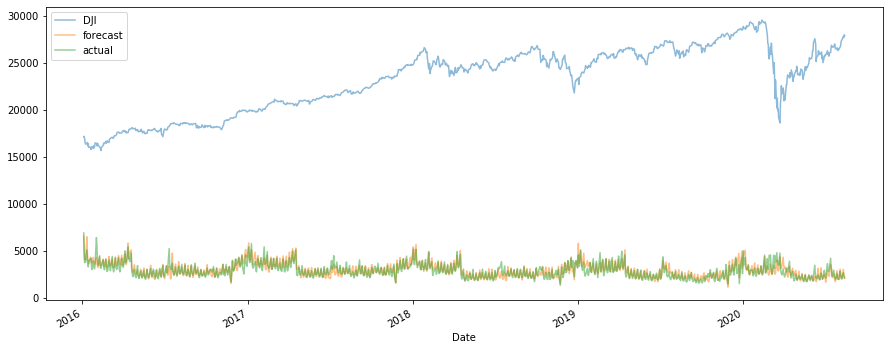

In [136]:
_ = df.plot(figsize = (15,6), alpha=.5)

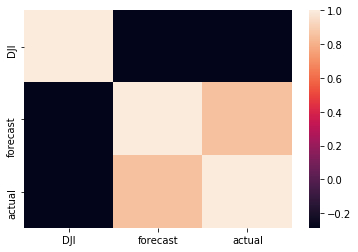

In [137]:
import seaborn as sns

_ = sns.heatmap(df.corr())

There is a weak negative correlation between DJI and actual and forecast volume (when dji goes down, volume tends to increase), while there is a strong positive correlation between actual and forecast volume (when actual volume increases, forecast volume tends to increase per the forecasting model)

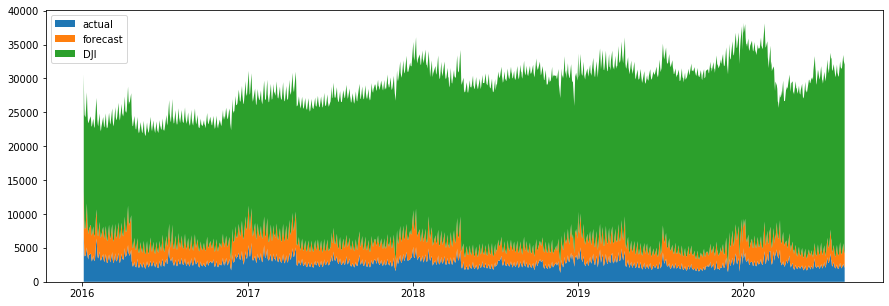

In [138]:
plt.figure(figsize=(15,5))
plt.stackplot(df.index, df['actual'], df['forecast'], df['DJI'], baseline='zero',
              labels= ['actual', 'forecast','DJI'])
plt.legend(loc='upper left')
plt.show()

In [139]:
pc = df.pct_change()

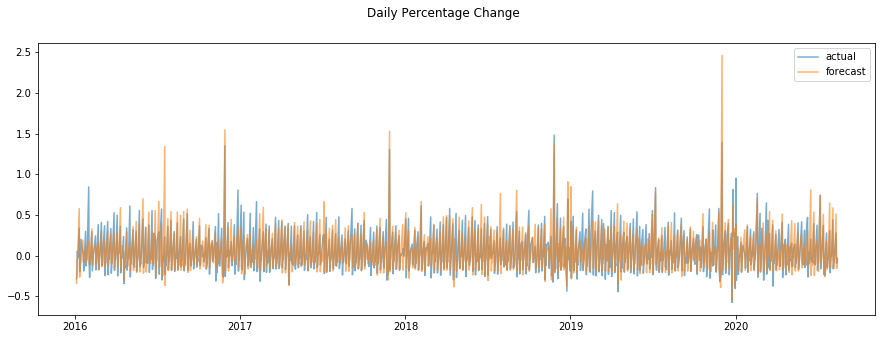

In [140]:
plt.figure(figsize=(15,5))
plt.plot(pc['actual'], alpha=.6)
# plt.plot(pc['DJI'], alpha=.1)
plt.plot(pc['forecast'], alpha=.6)
plt.legend(['actual', 'forecast'])
plt.suptitle('Daily Percentage Change')
plt.show()

In [141]:
df['diff'] = df['actual'] - df['forecast']

In [142]:
df['diff'].describe()

count    1160.000000
mean      -67.791379
std       399.323906
min     -1399.000000
25%      -296.250000
50%       -96.000000
75%       137.250000
max      2094.000000
Name: diff, dtype: float64

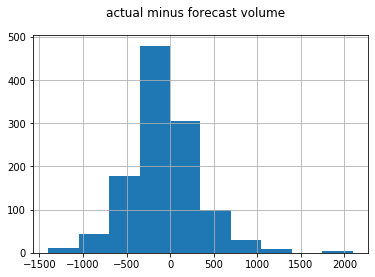

In [143]:
_ = df['diff'].hist()
plt.suptitle('actual minus forecast volume')
plt.show()

In [144]:
df[df['diff'] == df['diff'].min()]

,DJI,forecast,actual,diff
Date,,,,
2016-01-11,16398.57,6478,5079,-1399


In [145]:
df[df['diff'] == df['diff'].max()]

,DJI,forecast,actual,diff
Date,,,,
2016-02-01,16449.18,4287,6381,2094


In [157]:
'min',df.max(),'max',df.min()

('min',
 DJI         29551.42
 forecast     6547.00
 actual       6886.00
 diff         2094.00
 dtype: float64,
 'max',
 DJI         15660.18
 forecast     1121.00
 actual       1317.00
 diff        -1399.00
 dtype: float64)